# Visualization of threads and forks results

This document will show the comparison threads and forks performances in both windows subsystem for linux (WSL) and native linux. Thus, at the same time, this will also show us the effects of the WSL virtualization. 

This is the environment I made this study in :
* CPU : Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz   2.30 GHz
* OS : 
    - 1<sup>st</sup> part : WSL in windows 11 - Dev version - Ubuntu 20.04
    - 2<sup>nb</sup> part : Ubuntu 20.04 installed natively

**Note** : This study is made on the same dual booted computer (Windows 11 + Ubuntu 20.04)

## WSL

In this section, we will visualize the performances of both threads and forks in WSL 

In [172]:
import matplotlib.pyplot as plt
import numpy as np

In [173]:
path_wsl_case_sameLoop = {
    "fork" : "WSL/Same loop/fork.txt",
    "thread" : "WSL/Same loop/thread.txt"
}

path_wsl_case_forkBeforeThreads = {
    "fork" : "WSL/Fork before threads/fork.txt",
    "thread" : "WSL/Fork before threads/thread.txt"
}

path_wsl_case_threadBeforeFork = {
    "fork" : "WSL/Thread before fork/fork.txt",
    "thread" : "WSL/Thread before fork/thread.txt"
}

results = {}

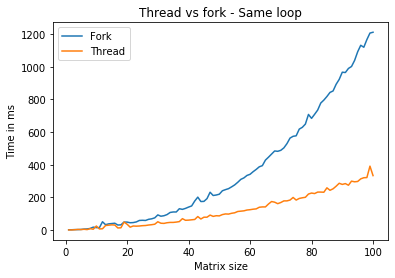

In [174]:
# Reading files

#same loop
xs = [i+1 for i in range (0, 100)]
forkData = []
threadData = []

with open(path_wsl_case_sameLoop['fork'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        forkData.append(int(line.split(':')[1]))
        line = reader.readline()
        
        
with open(path_wsl_case_sameLoop['thread'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        threadData.append(int(line.split(':')[1]))
        line = reader.readline()
        

results["sameLoop"] = {
    "fork": forkData[len(forkData) - 1],
    "thread" : threadData[len(threadData) - 1],
}

        
ax = plt.subplot()
ax.plot(xs, forkData, label="Fork")
ax.plot(xs, threadData, label="Thread")
ax.set_title("Thread vs fork - Same loop")
ax.set_xlabel("Matrix size")
ax.set_ylabel("Time in ms")
ax.legend()

plt.savefig("wsl_same_loop.png")

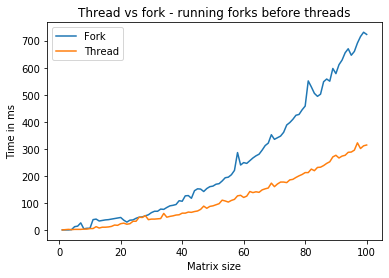

In [175]:
# fork before threads
xs = [i+1 for i in range (0, 100)]
forkData = []
threadData = []

with open(path_wsl_case_forkBeforeThreads['fork'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        forkData.append(int(line.split(':')[1]))
        line = reader.readline()
        
        
with open(path_wsl_case_forkBeforeThreads['thread'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        threadData.append(int(line.split(':')[1]))
        line = reader.readline()
        

results["forkBeforeThread"] = {
    "fork": forkData[len(forkData) - 1],
    "thread" : threadData[len(threadData) - 1],
}

ax = plt.subplot()
ax.plot(xs, forkData, label="Fork")
ax.plot(xs, threadData, label="Thread")
ax.set_title("Thread vs fork - running forks before threads")
ax.set_xlabel("Matrix size")
ax.set_ylabel("Time in ms")
ax.legend()

plt.savefig("wsl_fork_before_thread.png")

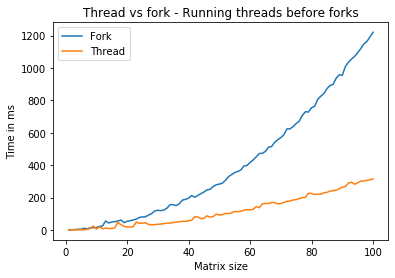

In [176]:
# thread before fork
xs = [i+1 for i in range (0, 100)]
forkData = []
threadData = []

with open(path_wsl_case_threadBeforeFork['fork'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        forkData.append(int(line.split(':')[1]))
        line = reader.readline()
        
        
with open(path_wsl_case_threadBeforeFork['thread'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        threadData.append(int(line.split(':')[1]))
        line = reader.readline()
        

results["threadBeforeFork"] = {
    "fork": forkData[len(forkData) - 1],
    "thread" : threadData[len(threadData) - 1],
}


ax = plt.subplot()
ax.plot(xs, forkData, label="Fork")
ax.plot(xs, threadData, label="Thread")
ax.set_title("Thread vs fork - Running threads before forks")
ax.set_xlabel("Matrix size")
ax.set_ylabel("Time in ms")
ax.legend()

plt.savefig("wsl_thread_before_fork.png")

[1212, 723, 1221]
[333, 314, 315]


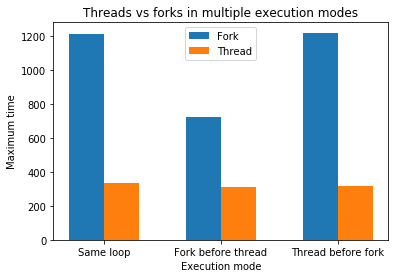

In [177]:
#plotting the maximums 

fig, ax0 = plt.subplots(nrows=1, ncols=1)

#Making the multiple bars histogram :
titles = ["Same loop", "Fork before thread", "Thread before fork"]
legends = ["Forks", "Threads"]

w = 0.3
xs = [i for i in range(3)]
xs2 = [i + w for i in xs]
forkData = [results[key]["fork"] for key in results.keys()]
threadData = [results[key]["thread"] for key in results.keys()]

replace = [i + w/2 for i in xs]

print(forkData)
print(threadData)

ax0.bar(xs, forkData, w, label="Fork")
ax0.bar(xs2, threadData, w, label="Thread")
ax0.set_title("Threads vs forks in multiple execution modes")
ax0.set_xlabel("Execution mode")
ax0.set_ylabel("Maximum time")
plt.xticks(replace, titles)
ax0.legend()

plt.savefig("wsl_maximums.png")

## Native ubuntu

This results are made in the same computer, on ubuntu 20.04 OS. 

In [178]:
path_linux_case_sameLoop = {
    "fork" : "Linux/Same loop - Thread before fork/fork.txt",
    "thread" : "Linux/Same loop - Thread before fork/thread.txt"
}

path_linux_case_forkBeforeThreads = {
    "fork" : "Linux/Fork before thread/fork.txt",
    "thread" : "Linux/Fork before thread/thread.txt"
}

path_linux_case_threadBeforeFork = {
    "fork" : "Linux/Thread before fork/fork.txt",
    "thread" : "Linux/Thread before fork/thread.txt"
}

results = {}

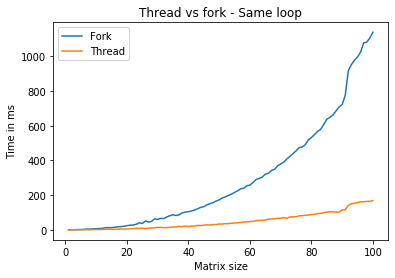

In [179]:
# Reading files

#same loop
xs = [i+1 for i in range (0, 100)]
forkData = []
threadData = []

with open(path_linux_case_sameLoop['fork'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        forkData.append(int(line.split(':')[1]))
        line = reader.readline()
        
        
with open(path_linux_case_sameLoop['thread'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        threadData.append(int(line.split(':')[1]))
        line = reader.readline()
        

results["sameLoop"] = {
    "fork": forkData[len(forkData) - 1],
    "thread" : threadData[len(threadData) - 1],
}

        
ax = plt.subplot()
ax.plot(xs, forkData, label="Fork")
ax.plot(xs, threadData, label="Thread")
ax.set_title("Thread vs fork - Same loop")
ax.set_xlabel("Matrix size")
ax.set_ylabel("Time in ms")
ax.legend()

plt.savefig("linux_same_loop.png")

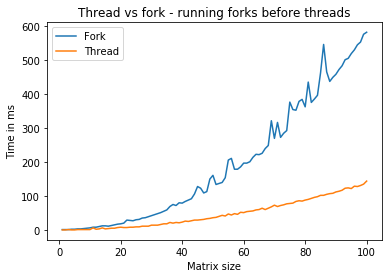

In [180]:
# fork before threads
xs = [i+1 for i in range (0, 100)]
forkData = []
threadData = []

with open(path_linux_case_forkBeforeThreads['fork'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        forkData.append(int(line.split(':')[1]))
        line = reader.readline()
        
        
with open(path_linux_case_forkBeforeThreads['thread'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        threadData.append(int(line.split(':')[1]))
        line = reader.readline()
        

results["forkBeforeThread"] = {
    "fork": forkData[len(forkData) - 1],
    "thread" : threadData[len(threadData) - 1],
}

ax = plt.subplot()
ax.plot(xs, forkData, label="Fork")
ax.plot(xs, threadData, label="Thread")
ax.set_title("Thread vs fork - running forks before threads")
ax.set_xlabel("Matrix size")
ax.set_ylabel("Time in ms")
ax.legend()

plt.savefig("linux_fork_before_thread.png")

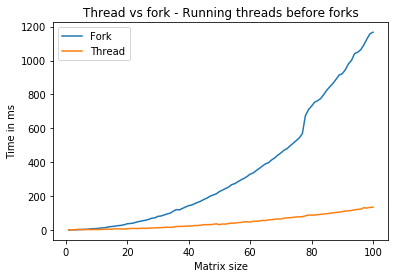

In [181]:
# thread before fork
xs = [i+1 for i in range (0, 100)]
forkData = []
threadData = []

with open(path_linux_case_threadBeforeFork['fork'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        forkData.append(int(line.split(':')[1]))
        line = reader.readline()
        
        
with open(path_linux_case_threadBeforeFork['thread'], 'r') as reader :
    line = reader.readline()
    while line != '' : 
        threadData.append(int(line.split(':')[1]))
        line = reader.readline()
        

results["threadBeforeFork"] = {
    "fork": forkData[len(forkData) - 1],
    "thread" : threadData[len(threadData) - 1],
}


ax = plt.subplot()
ax.plot(xs, forkData, label="Fork")
ax.plot(xs, threadData, label="Thread")
ax.set_title("Thread vs fork - Running threads before forks")
ax.set_xlabel("Matrix size")
ax.set_ylabel("Time in ms")
ax.legend()

plt.savefig("linux_thread_before_fork.png")

[1138, 583, 1167]
[169, 144, 134]


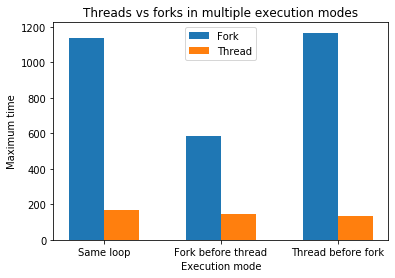

In [182]:
#plotting the maximums 

fig, ax0 = plt.subplots(nrows=1, ncols=1)

#Making the multiple bars histogram :
titles = ["Same loop", "Fork before thread", "Thread before fork"]
legends = ["Forks", "Threads"]

w = 0.3
xs = [i for i in range(3)]
xs2 = [i + w for i in xs]
forkData = [results[key]["fork"] for key in results.keys()]
threadData = [results[key]["thread"] for key in results.keys()]

replace = [i + w/2 for i in xs]

print(forkData)
print(threadData)

ax0.bar(xs, forkData, w, label="Fork")
ax0.bar(xs2, threadData, w, label="Thread")
ax0.set_title("Threads vs forks in multiple execution modes")
ax0.set_xlabel("Execution mode")
ax0.set_ylabel("Maximum time")
plt.xticks(replace, titles)
ax0.legend()

plt.savefig("linux_maximums.png")

# Final version

## Introduction

If you have a little experience in parallel programming, you certainly know the two approaches to code parallel applications : **Threads (lighweight processes) and Forks (heavyweight processes)**. 

In this article, we will see how matrix multiplication performs using those two approaches, and how to find the best number of threads or forks to create to make use of your whole cpu's power. 

## Prerequisites

This article is intended to those who : 
* Something

## Threads vs forks